In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, filters, transform
from numba import jit
import matplotlib as mpl

In [2]:
nebula_alpha = io.imread('/home/matheus/github/natural_artificial_vision/imagens_teste/southern_ring_nebula.png')
print("Shape of nebula: ", nebula_alpha.shape)
baboon = io.imread('/home/matheus/github/natural_artificial_vision/imagens_teste/baboon.tiff')
print("Shape of baboon: ", baboon.shape)
earth = io.imread('/home/matheus/github/natural_artificial_vision/imagens_teste/Earth.bmp')
print("Shape of earth: ", earth.shape)
dog = io.imread('/home/matheus/github/natural_artificial_vision/imagens_teste/Malamute.bmp')
print("Shape of dpg: ", dog.shape)
rua = io.imread('/home/matheus/github/natural_artificial_vision/imagens_teste/IMG_5439.JPG')
print("Shape of rua: ", rua.shape)
statue = io.imread('/home/matheus/github/natural_artificial_vision/imagens_teste/IMG_5387.JPG')
print("Shape of statue: ", statue.shape)
panda = io.imread('/home/matheus/github/natural_artificial_vision/imagens_teste/panda.jpg')
print("Shape of statue: ", panda.shape)
lenna = io.imread('/home/matheus/github/natural_artificial_vision/imagens_teste/lenna.png')
print("Shape of statue: ", lenna.shape)
com_copo = io.imread('/home/matheus/github/natural_artificial_vision/imagens_teste/com_copo.jpeg')
print("Shape of statue: ", com_copo.shape)
sem_copo = io.imread('/home/matheus/github/natural_artificial_vision/imagens_teste/sem_copo.jpeg')
print("Shape of statue: ", sem_copo.shape)

Shape of nebula:  (720, 770, 4)
Shape of baboon:  (512, 512, 3)
Shape of earth:  (768, 749, 3)
Shape of dpg:  (1080, 1616, 3)
Shape of rua:  (1728, 2592, 3)
Shape of statue:  (1728, 2592, 3)
Shape of statue:  (512, 512, 3)
Shape of statue:  (512, 512, 3)
Shape of statue:  (1600, 900, 3)
Shape of statue:  (1600, 900, 3)


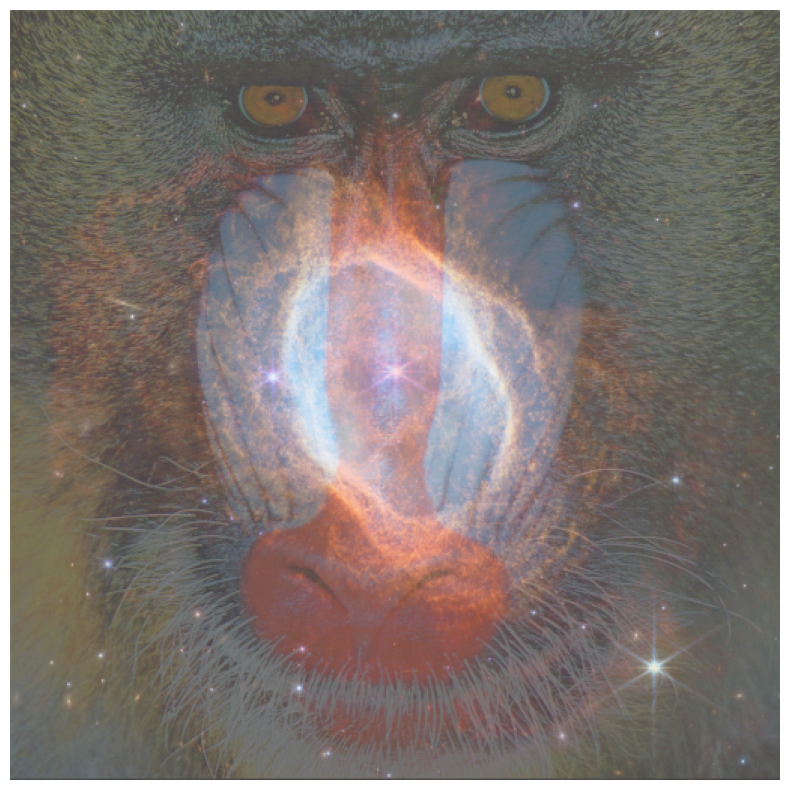

In [3]:
#babuino estelar
plt.figure(figsize=(10,10))

nebulosa_baboon = transform.resize(nebula_alpha, (512, 512), anti_aliasing=True)

plt.imshow(baboon, alpha=0.5)
plt.imshow(nebulosa_baboon, alpha=0.5)




plt.axis('off')
plt.show()

In [19]:
#tirando alpha de nebula
nebula = nebula_alpha[:,:,:3]
print(nebula.shape)

#nebula cinza
gray_nebula = color.rgb2gray(nebula)
print(gray_nebula.shape)
x = np.array(gray_nebula)


(720, 770, 3)
(720, 770)


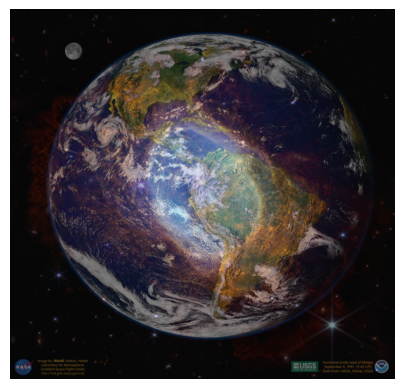

In [5]:
#soma de imagens
nebula_earth = transform.resize(nebula, (720,749), anti_aliasing=True)
earth_nebula = transform.resize(earth, (720,749), anti_aliasing=True)

def sum_img(img1, x, img2, y):
    new_img = x*img1 + y*img2
    return new_img

sum_nebula_earth = sum_img(nebula_earth,0.5,earth_nebula,0.5)

plt.imshow(sum_nebula_earth)
plt.axis('off')
plt.show()

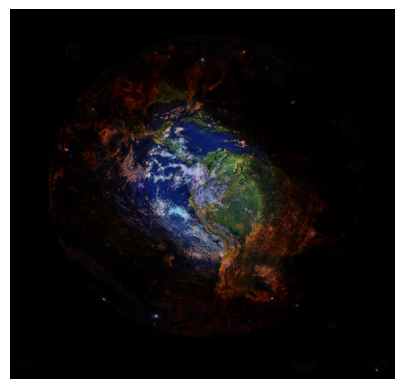

In [6]:
#multiplicação de imagens
def mult_img(img1,img2):
    new_img = img1 * img2
    return new_img

mult_nebula_earth = mult_img(nebula_earth,earth_nebula)

plt.imshow(mult_nebula_earth)
plt.axis('off')
plt.show()


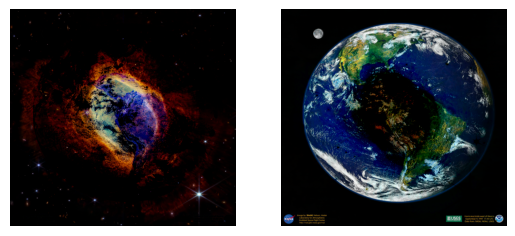

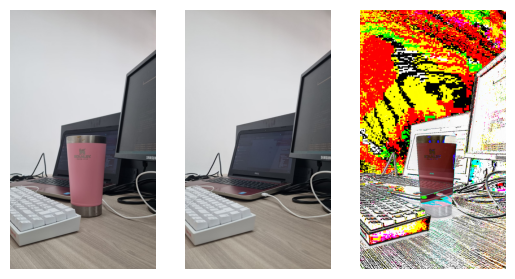

In [7]:
#subtração de imagens
def subt_img(img1, img2):
    new_img = np.clip(img1 - img2, 0, 255)
    return new_img

subt_nebula_earth = subt_img(nebula_earth, earth_nebula)
subt_earth_nebula = subt_img(earth_nebula,nebula_earth)

plt.subplot(1,2,1)
plt.imshow(subt_nebula_earth)
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(subt_earth_nebula)
plt.axis('off')
plt.show()

subt_copo = subt_img(com_copo,sem_copo)

plt.subplot(1,3,1)
plt.imshow(com_copo)
plt.axis('off')
plt.subplot(1,3,2)
plt.imshow(sem_copo)
plt.axis('off')
plt.subplot(1,3,3)
plt.imshow(subt_copo)
plt.axis('off')
plt.show()


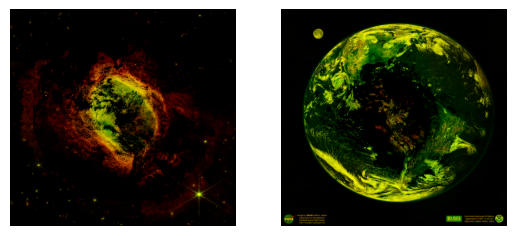

/tmp/ipykernel_980/606775091.py:8: RuntimeWarning: overflow encountered in scalar subtract
  new_image[i,j,k] = np.clip(img1[i,j,k] - img2[i,j,k],0,255)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


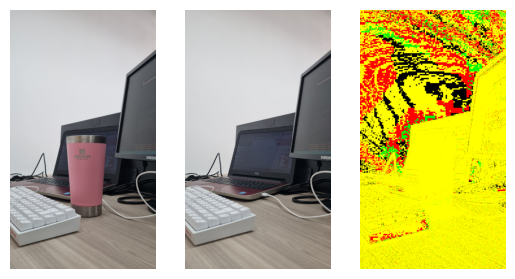

In [14]:
#subtração de imagens pixel à pixel

def subt_img(img1, img2):
    new_image = np.zeros((img1.shape[0],img1.shape[1],img1.shape[2]))
    for i in range(0,(img1.shape[0])):
        for j in range(0,(img1.shape[1])):
            for k in range(0,2):
                new_image[i,j,k] = np.clip(img1[i,j,k] - img2[i,j,k],0,255)
    return new_image

subt_nebula_earth = subt_img(nebula_earth, earth_nebula)
subt_earth_nebula = subt_img(earth_nebula,nebula_earth)

plt.subplot(1,2,1)
plt.imshow(subt_nebula_earth)
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(subt_earth_nebula)
plt.axis('off')
plt.show()

subt_copo = subt_img(com_copo,sem_copo)

plt.subplot(1,3,1)
plt.imshow(com_copo)
plt.axis('off')
plt.subplot(1,3,2)
plt.imshow(sem_copo)
plt.axis('off')
plt.subplot(1,3,3)
plt.imshow(subt_copo)
plt.axis('off')
plt.show()

In [17]:
#histogramas de imagem
def histogram_gray(img):
    hist = np.zeros((255))
    for i in range(0,(img.shape[0])):
        for j in range(0,(img.shape[1])):
            value = img[i,j]
            hist[value-1] += 1
    return hist



hist_nebula = histogram_gray(gray_nebula)
array_nebula = np.array(nebula)


plt.ylim(0,max(hist_nebula))
plt.hist(hist_nebula, bins=255, color='red')
plt.xlabel('Valor do Pixel')
plt.ylabel('Quantidade de Aparecimentos')
plt.title('Histograma de Nebula')
plt.show()





IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [10]:
copo = np.array(com_copo)
print(copo)

[[[191 192 194]
  [191 192 194]
  [191 192 194]
  ...
  [158 153 150]
  [158 153 150]
  [157 152 149]]

 [[191 192 194]
  [191 192 194]
  [191 192 194]
  ...
  [158 153 150]
  [158 153 150]
  [157 152 149]]

 [[192 193 195]
  [192 193 195]
  [192 193 195]
  ...
  [158 153 150]
  [158 153 150]
  [158 153 150]]

 ...

 [[155 146 137]
  [154 145 136]
  [153 144 135]
  ...
  [139 127 115]
  [142 130 118]
  [145 133 121]]

 [[159 150 141]
  [157 148 139]
  [154 145 136]
  ...
  [133 121 109]
  [135 123 111]
  [137 125 113]]

 [[163 154 145]
  [159 150 141]
  [155 146 137]
  ...
  [128 116 104]
  [130 118 106]
  [131 119 107]]]
